# Laboratory 1 - Boston House Prices: Linear Regression
Submitted by: Anthony Aromin

## Initial Setup

In [38]:
# import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# ignore deprecation warning of boston dataset
import warnings
warnings.simplefilter('ignore', FutureWarning)

# load Boston house prices dataset
boston = datasets.load_boston()

In [39]:
# check the values I can access
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [40]:
# check the description of the Boston house prices dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [41]:
# get data and target
x = boston.data
y = boston.target

## Training

In [42]:
# split the data for training
# 80% training - 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [43]:
# create regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## Testing

In [44]:
# predict prices using model
y_predict = model.predict(x_test)

In [45]:
# check root mean square error
rmse = np.sqrt(np.square(y_test - y_predict).mean())

print('Root Mean Squared Error: {:.2f}'.format(rmse))

Root Mean Squared Error: 3.68


[Text(0.5, 0, 'Predicted Prices (in $1000)'),
 Text(0, 0.5, 'Actual Prices (in $1000)'),
 Text(0.5, 1.0, 'Comparison between Actual and Predicted Prices using Linear Regression')]

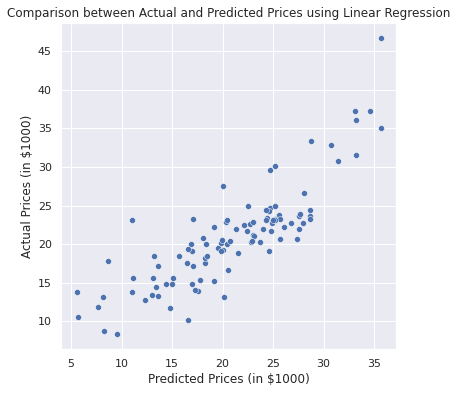

In [46]:

# visually compare predictions with actual values
data = pd.DataFrame(zip(y_test, y_predict), columns=['actual prices', 'predicted prices'])

sb.set(rc={'figure.figsize':(6, 6)})
sb.scatterplot(
    data=data,
    x='predicted prices',
    y='actual prices'
).set(
    xlabel='Predicted Prices (in $1000)',
    ylabel='Actual Prices (in $1000)',
    title='Comparison between Actual and Predicted Prices using Linear Regression'
)

In [47]:
# setup for graphing
x_test_df = pd.DataFrame(x_test)
y_test_df = pd.DataFrame(y_test)

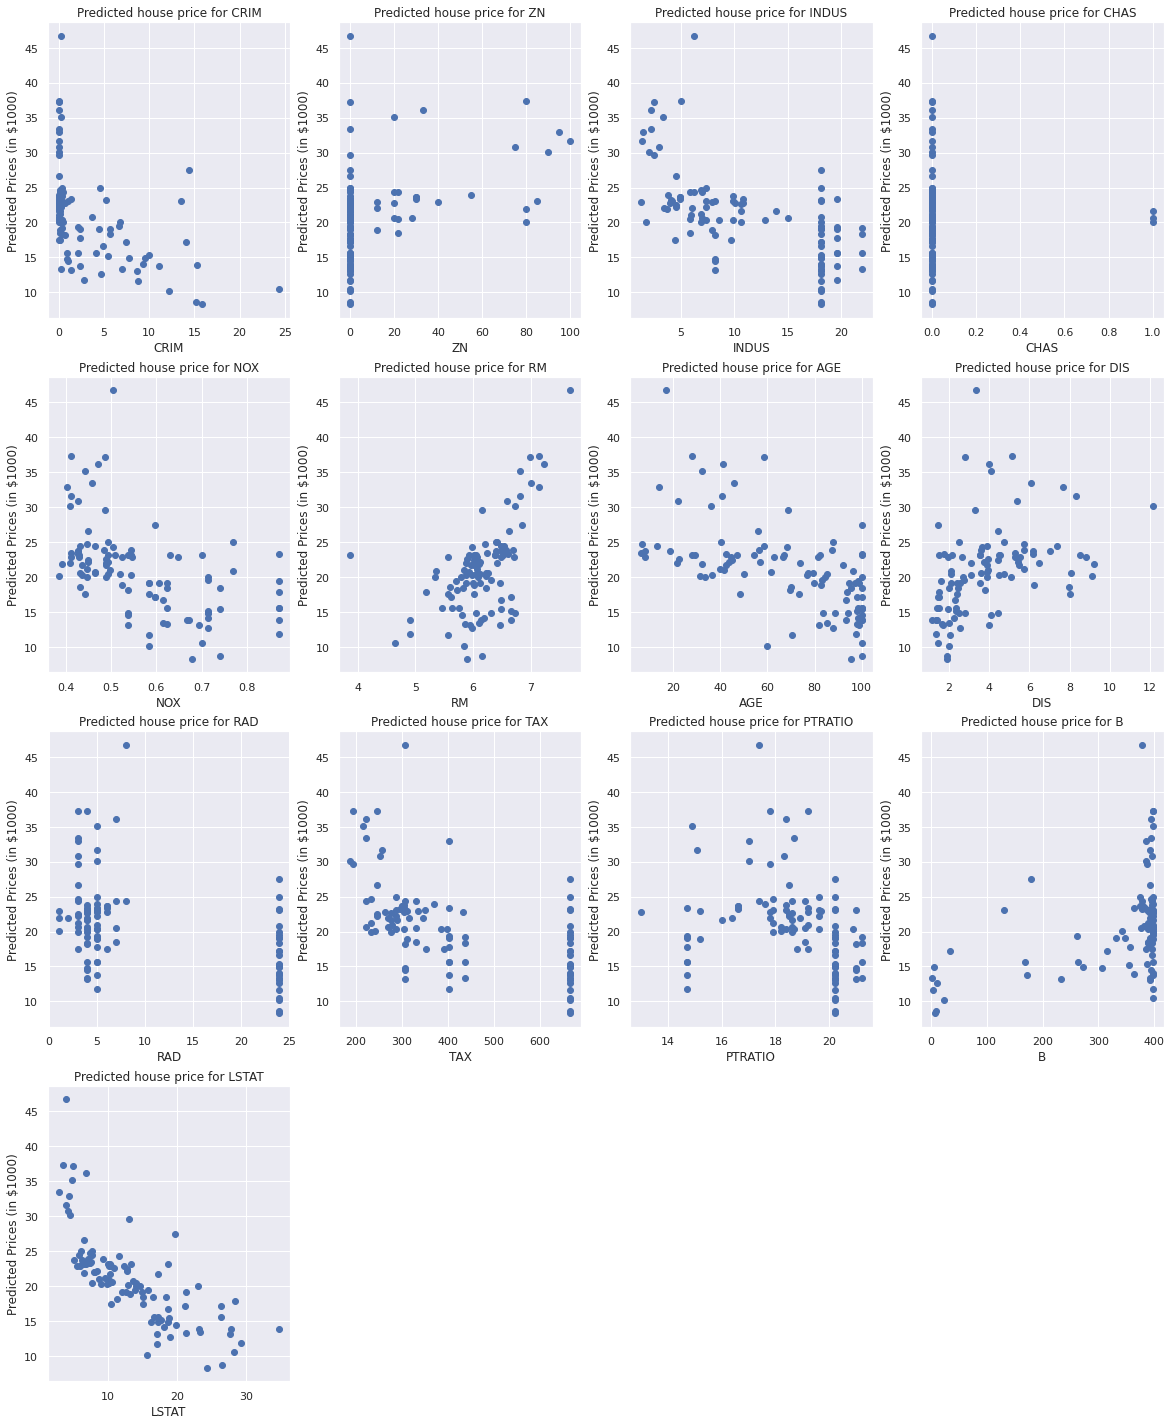

In [57]:
# predicted house prices for individual variables

plt.figure(figsize=(20, 25))

for i, col in enumerate(boston.feature_names):
    plt.subplot(
        4,
        int(np.ceil(len(boston.feature_names) / 4)),
        i + 1
    )
    x = x_test_df[i]
    y = y_test_df
    plt.scatter(x, y, marker='o')
    plt.title("Predicted house price for {0}".format(col))
    plt.xlabel(col)
    plt.ylabel('Predicted Prices (in $1000)')